## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:


# 1. Import libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# 2. Obtain Data

In [118]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 3. Scrub and Clean Data

### Check Data Types

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [120]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

### Check for Erroneous Values (i.e. ?)

In [121]:
# sqft_basement includes 454 instances of '?'
sum(df['sqft_basement'] =='?')

454

In [122]:
# Verify that instances are dropped
sum(df['sqft_basement'] =='?')

454

In [123]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  object 
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

### Check for Null Values

In [124]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [125]:
# Check waterfront
df['waterfront'].value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [126]:
# Fill NaNs with mode (which is 0, the majority of the data)
df['waterfront'].fillna(df['waterfront'].mode(), inplace = True)

In [127]:
# Double-check waterfront
df['waterfront'].isna().sum()

2338

In [128]:
# Check view
df['view'].value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [129]:
# Drop NaNs (61, small percentage of data)
df.dropna(subset = ['view'], inplace = True)

In [130]:
# Double-check view
df['view'].isna().sum()

0

In [131]:
# Check yr_renovated
df['yr_renovated'].value_counts()

0.0       16618
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [132]:
# Drop yr_renovated column (large percentage is either 0 (16618) or NaNs (3754))
df.drop('yr_renovated', axis = 1, inplace = True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     18750 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21082 non-null  int64  
 11  grade          21082 non-null  int64  
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  object 
 14  yr_built       21082 non-null  int64  
 15  zipcode        21082 non-null  int64  
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

### Numeric Data Encoded as Strings
- sqft_basement

In [134]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     18750 non-null  float64
 9   view           21082 non-null  float64
 10  condition      21082 non-null  int64  
 11  grade          21082 non-null  int64  
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  float64
 14  yr_built       21082 non-null  int64  
 15  zipcode        21082 non-null  int64  
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

### Categorical Data Encoded as Integers
- waterfront, view, zipcode, condition, and grade

In [136]:
convert_to_str = ['waterfront', 'view', 'zipcode', 'condition', 'grade']

for col in convert_to_str:
    df[col] = df[col].astype('str')        

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_living    21082 non-null  int64  
 6   sqft_lot       21082 non-null  int64  
 7   floors         21082 non-null  float64
 8   waterfront     21082 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21082 non-null  object 
 11  grade          21082 non-null  object 
 12  sqft_above     21082 non-null  int64  
 13  sqft_basement  21082 non-null  float64
 14  yr_built       21082 non-null  int64  
 15  zipcode        21082 non-null  object 
 16  lat            21082 non-null  float64
 17  long           21082 non-null  float64
 18  sqft_l

## Check for Multicollinearity

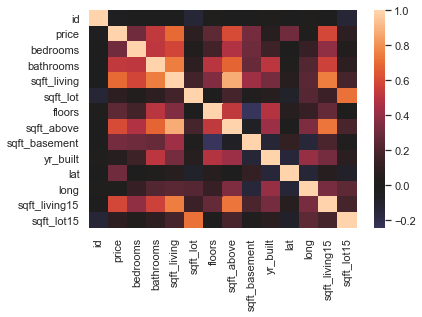

In [138]:
sns.heatmap(df.corr(), center=0);

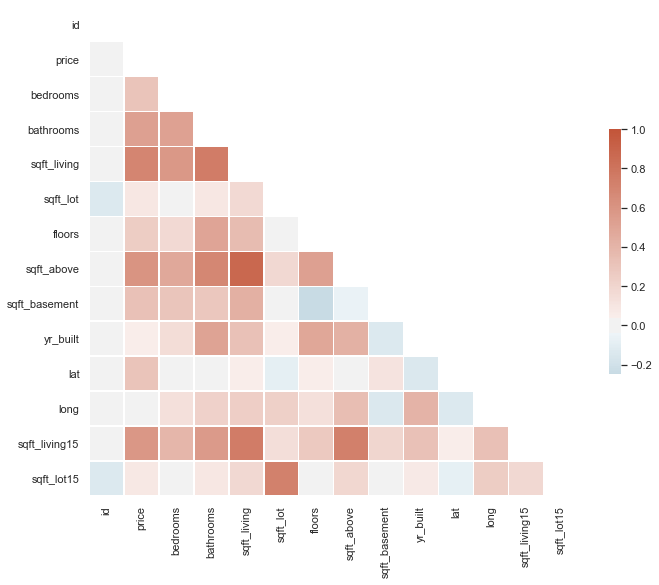

In [139]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [140]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016413,0.002267,0.005873,-0.011866,-0.132412,0.019150,-0.010757,-0.004480,0.022179,-0.005062,0.021254,-0.003084,-0.138114
price,-0.016413,1.000000,0.308454,0.525029,0.702004,0.088400,0.256603,0.605481,0.323018,0.054849,0.307667,0.022512,0.586495,0.083530
bedrooms,0.002267,0.308454,1.000000,0.513694,0.577696,0.032531,0.178518,0.478967,0.301987,0.156820,-0.009939,0.131398,0.391936,0.030779
bathrooms,0.005873,0.525029,0.513694,1.000000,0.754793,0.088451,0.503796,0.685959,0.281813,0.508866,0.025243,0.224660,0.569396,0.089414
sqft_living,-0.011866,0.702004,0.577696,0.754793,1.000000,0.173266,0.354260,0.876787,0.433369,0.319584,0.053213,0.241473,0.756199,0.184920
sqft_lot,-0.132412,0.088400,0.032531,0.088451,0.173266,1.000000,-0.007745,0.183653,0.015612,0.052469,-0.085076,0.230489,0.143815,0.719499
floors,0.019150,0.256603,0.178518,0.503796,0.354260,-0.007745,1.000000,0.523594,-0.245628,0.489898,0.049237,0.125360,0.279379,-0.011632
sqft_above,-0.010757,0.605481,0.478967,0.685959,0.876787,0.183653,0.523594,1.000000,-0.053403,0.425170,-0.000014,0.344774,0.730794,0.195983
sqft_basement,-0.004480,0.323018,0.301987,0.281813,0.433369,0.015612,-0.245628,-0.053403,1.000000,-0.133178,0.110526,-0.144709,0.200709,0.016705
yr_built,0.022179,0.054849,0.156820,0.508866,0.319584,0.052469,0.489898,0.425170,-0.133178,1.000000,-0.148165,0.409009,0.325657,0.071184


In [141]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [142]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [143]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876787
"(sqft_living, sqft_living15)",0.756199
"(bathrooms, sqft_living)",0.754793


In [144]:
# Drop sqft_living as it is highly correlated to sqft_above, sqft_living15, and bathrooms
df.drop('sqft_living', axis = 1, inplace = True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21082 non-null  int64  
 1   date           21082 non-null  object 
 2   price          21082 non-null  float64
 3   bedrooms       21082 non-null  int64  
 4   bathrooms      21082 non-null  float64
 5   sqft_lot       21082 non-null  int64  
 6   floors         21082 non-null  float64
 7   waterfront     21082 non-null  object 
 8   view           21082 non-null  object 
 9   condition      21082 non-null  object 
 10  grade          21082 non-null  object 
 11  sqft_above     21082 non-null  int64  
 12  sqft_basement  21082 non-null  float64
 13  yr_built       21082 non-null  int64  
 14  zipcode        21082 non-null  object 
 15  lat            21082 non-null  float64
 16  long           21082 non-null  float64
 17  sqft_living15  21082 non-null  int64  
 18  sqft_l

## Normalize Data

In [146]:
# Price is Y
# Not using id, date, lat, and long
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode']
continuous = ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

### Drop additional columns

In [147]:
df.drop(columns=['id', 'date', 'lat', 'long'], inplace=True) 

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   bedrooms       21082 non-null  int64  
 2   bathrooms      21082 non-null  float64
 3   sqft_lot       21082 non-null  int64  
 4   floors         21082 non-null  float64
 5   waterfront     21082 non-null  object 
 6   view           21082 non-null  object 
 7   condition      21082 non-null  object 
 8   grade          21082 non-null  object 
 9   sqft_above     21082 non-null  int64  
 10  sqft_basement  21082 non-null  float64
 11  yr_built       21082 non-null  int64  
 12  zipcode        21082 non-null  object 
 13  sqft_living15  21082 non-null  int64  
 14  sqft_lot15     21082 non-null  int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 2.6+ MB


### Continous

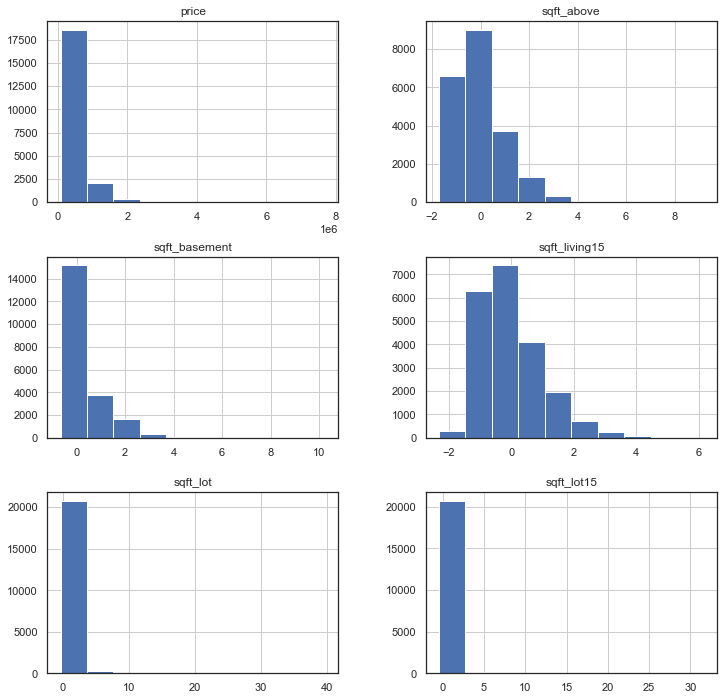

In [156]:
df[['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].hist(figsize = [12, 12]); 

In [157]:
df_log = ['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for feature in df_log:
    df[feature]= np.log(df[feature])

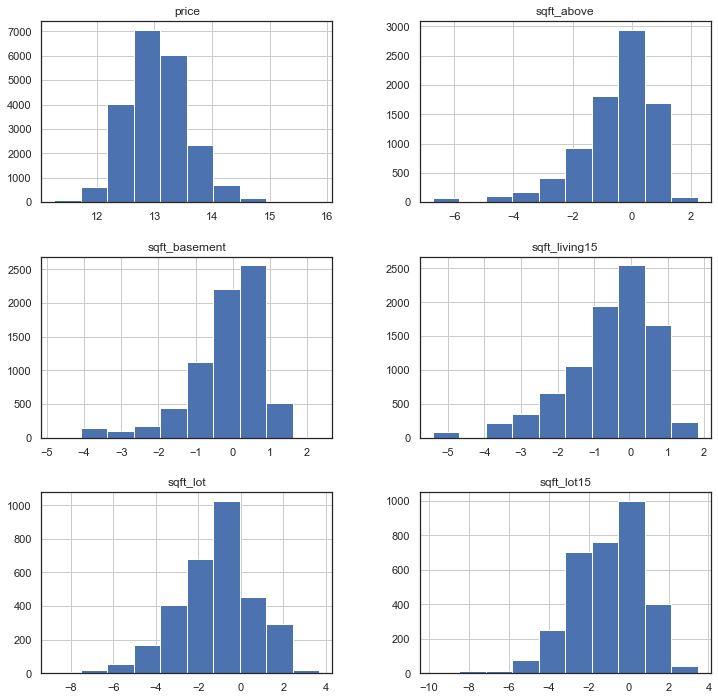

In [158]:
df[['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].hist(figsize = [12, 12]); 

### Categorical

In [149]:
# One-hot encode
df = pd.get_dummies(df) 
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,5650,1.0,1180,0.0,1955,1340,5650,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7242,2.0,2170,400.0,1951,1690,7639,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,770,0.0,1933,2720,8062,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,1050,910.0,1965,1360,5000,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,1680,0.0,1987,1800,7503,...,0,0,0,0,0,0,0,0,0,0


### Convert all of our numeric columns to the same scale by normalizing our dataset

### Check for Linearity